In [75]:
print("hello")

hello


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df=pd.read_csv("rwsi_data.csv")

In [78]:
df.shape

(12330, 20)

In [79]:
df.head()

,SessionID,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,HolidayProximityIndex,VisitMonth,UserPlatformID,WebClientCode,MarketZone,TrafficSourceCode,UserCategory,IsWeekendVisit,MonetaryConversion
0,jv3uDyqYltpoXreO,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,February,Windows,Safari,North America,1.0,Returning,False,No
1,eBHG5YGyco8TRlac,4.0,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,February,Android,Chrome,NaN,2.0,Returning,False,No
2,Lz5fuqr91SKGHb5N,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,February,MacOS,Safari,Other,3.0,Returning,False,No
3,cyOsumxkpNEvKIdc,4.0,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,February,iOS,NaN,Europe,4.0,Returning,False,No
4,F4rTMKOqtoPKzxw9,2.0,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,NaN,February,iOS,Internet Explorer,NaN,4.0,Returning,True,No


In [80]:
df.columns

Index(['SessionID', 'AdClicks', 'InfoSectionCount', 'InfoSectionTime',
       'HelpPageVisits', 'HelpPageTime', 'ItemBrowseCount', 'ItemBrowseTime',
       'ExitRateFirstPage', 'SessionExitRatio', 'PageEngagementScore',
       'HolidayProximityIndex', 'VisitMonth', 'UserPlatformID',
       'WebClientCode', 'MarketZone', 'TrafficSourceCode', 'UserCategory',
       'IsWeekendVisit', 'MonetaryConversion'],
      dtype='object')

In [81]:
df.dtypes

SessionID                 object
AdClicks                 float64
InfoSectionCount         float64
InfoSectionTime          float64
HelpPageVisits           float64
HelpPageTime             float64
ItemBrowseCount          float64
ItemBrowseTime           float64
ExitRateFirstPage        float64
SessionExitRatio         float64
PageEngagementScore      float64
HolidayProximityIndex    float64
VisitMonth                object
UserPlatformID            object
WebClientCode             object
MarketZone                object
TrafficSourceCode        float64
UserCategory              object
IsWeekendVisit              bool
MonetaryConversion        object
dtype: object

In [82]:
df.isnull().sum().sort_values(ascending=False).head(20)

AdClicks                 863
TrafficSourceCode        616
MarketZone               616
WebClientCode            616
UserPlatformID           493
HolidayProximityIndex    493
ItemBrowseCount          493
ItemBrowseTime           493
UserCategory             493
PageEngagementScore      369
InfoSectionTime          369
InfoSectionCount         369
SessionExitRatio         246
HelpPageTime             246
HelpPageVisits           246
ExitRateFirstPage        123
IsWeekendVisit             0
SessionID                  0
VisitMonth                 0
MonetaryConversion         0
dtype: int64

In [83]:
#ensure target is in correct format
if "MonetaryConversion" not in df.columns:
    raise ValueError("Target column 'MonetaryConversion' not found in dataset.")

# convert target to numeric 1/0
df["MonetaryConversion"] = (df["MonetaryConversion"].map({"Yes": 1, "No": 0}).fillna(df["MonetaryConversion"]))

In [84]:
(df["MonetaryConversion"].value_counts(dropna=False))


MonetaryConversion
0    10422
1     1908
Name: count, dtype: int64

In [85]:
#categorical columns (object, category, bool)
cat_cols = (
    df.select_dtypes(include=["object", "category", "bool"])
    .columns.tolist()
)

In [86]:
print(cat_cols)

['SessionID', 'VisitMonth', 'UserPlatformID', 'WebClientCode', 'MarketZone', 'UserCategory', 'IsWeekendVisit']


In [87]:
if "SessionID" in cat_cols:
    cat_cols.remove("SessionID")

In [88]:
cat_cols

['VisitMonth',
 'UserPlatformID',
 'WebClientCode',
 'MarketZone',
 'UserCategory',
 'IsWeekendVisit']

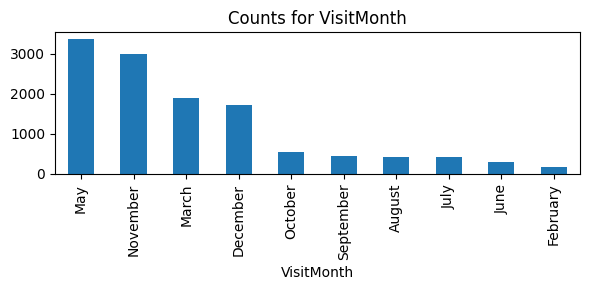

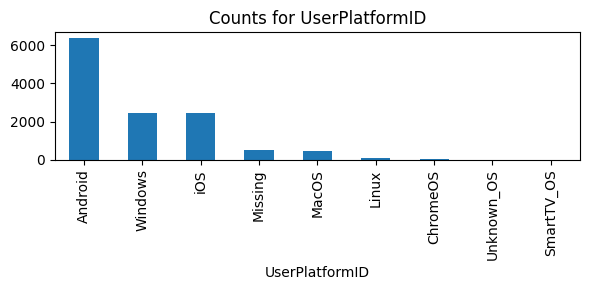

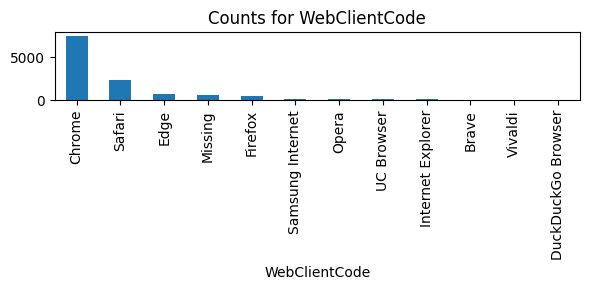

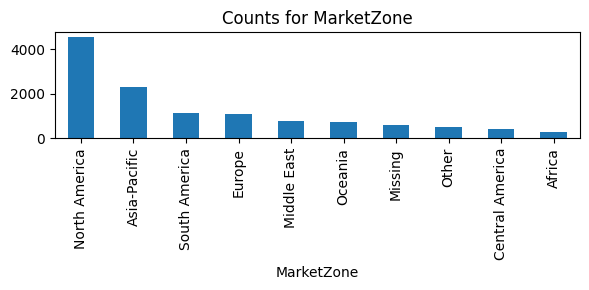

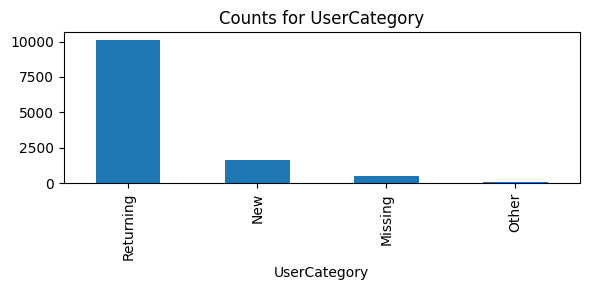

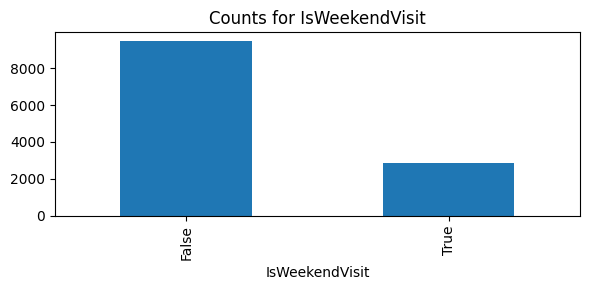

In [89]:
for col in cat_cols:
    plt.figure(figsize=(6,3))
    df[col].fillna("Missing").value_counts().nlargest(12).plot(kind="bar")
    plt.title(f"Counts for {col}")
    plt.tight_layout()
    plt.show()

In [90]:
#numerical columns
num_cols = (df.select_dtypes(include=[np.number]).columns.tolist())
if "MonetaryConversion" in num_cols:
    num_cols.remove("MonetaryConversion")
num_cols

['AdClicks',
 'InfoSectionCount',
 'InfoSectionTime',
 'HelpPageVisits',
 'HelpPageTime',
 'ItemBrowseCount',
 'ItemBrowseTime',
 'ExitRateFirstPage',
 'SessionExitRatio',
 'PageEngagementScore',
 'HolidayProximityIndex',
 'TrafficSourceCode']

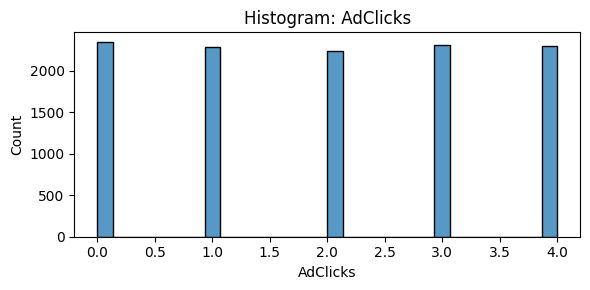

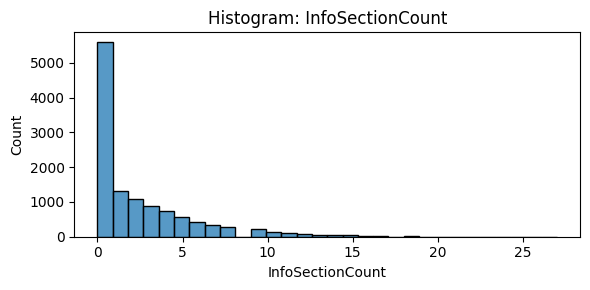

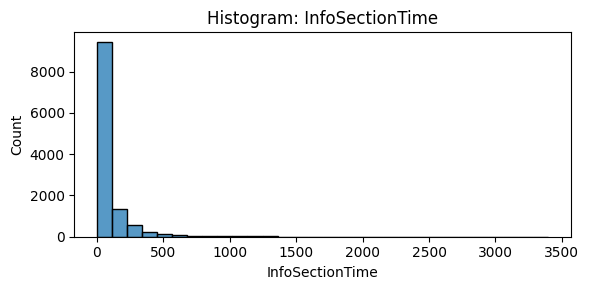

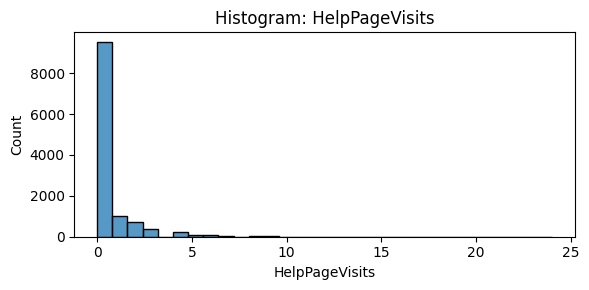

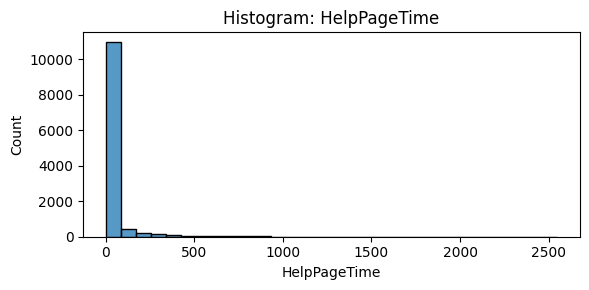

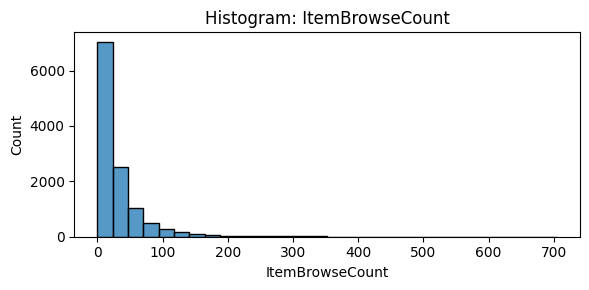

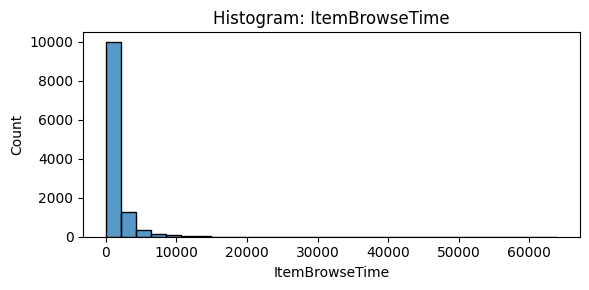

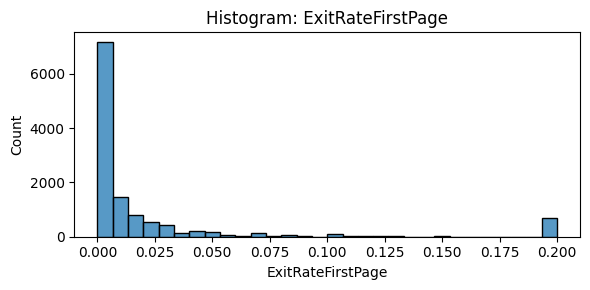

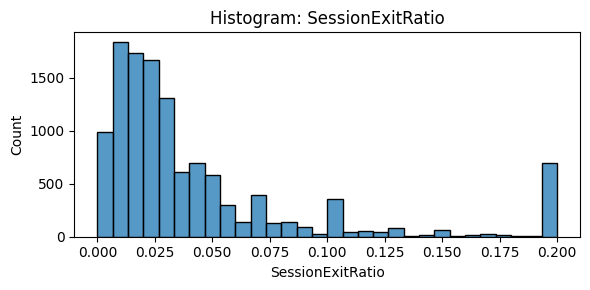

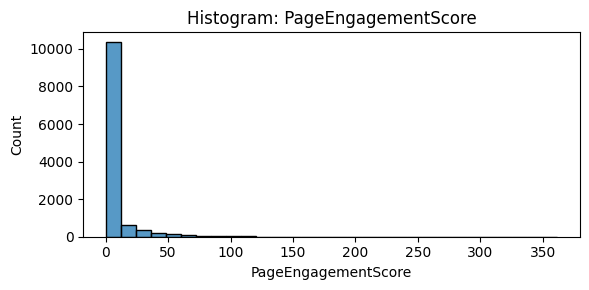

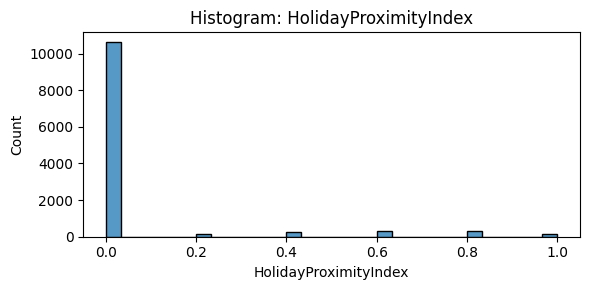

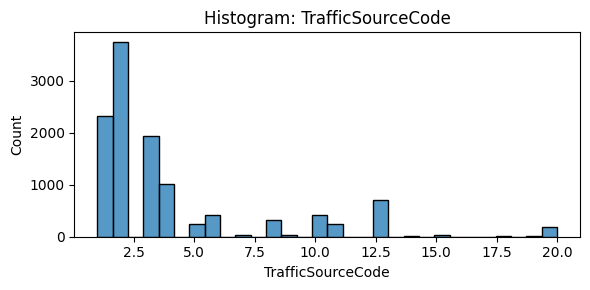

In [91]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col].dropna(),bins=30,kde=False)
    plt.title(f"Histogram: {col}")
    plt.tight_layout()
    plt.show()

In [92]:
df.head()

,SessionID,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,HolidayProximityIndex,VisitMonth,UserPlatformID,WebClientCode,MarketZone,TrafficSourceCode,UserCategory,IsWeekendVisit,MonetaryConversion
0,jv3uDyqYltpoXreO,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,February,Windows,Safari,North America,1.0,Returning,False,0
1,eBHG5YGyco8TRlac,4.0,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,February,Android,Chrome,NaN,2.0,Returning,False,0
2,Lz5fuqr91SKGHb5N,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,February,MacOS,Safari,Other,3.0,Returning,False,0
3,cyOsumxkpNEvKIdc,4.0,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,February,iOS,NaN,Europe,4.0,Returning,False,0
4,F4rTMKOqtoPKzxw9,2.0,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,NaN,February,iOS,Internet Explorer,NaN,4.0,Returning,True,0


In [93]:
df.isnull().sum()

SessionID                  0
AdClicks                 863
InfoSectionCount         369
InfoSectionTime          369
HelpPageVisits           246
HelpPageTime             246
ItemBrowseCount          493
ItemBrowseTime           493
ExitRateFirstPage        123
SessionExitRatio         246
PageEngagementScore      369
HolidayProximityIndex    493
VisitMonth                 0
UserPlatformID           493
WebClientCode            616
MarketZone               616
TrafficSourceCode        616
UserCategory             493
IsWeekendVisit             0
MonetaryConversion         0
dtype: int64

In [94]:
# Drop columns with more than 60% missing values
missing_frac = df.isnull().mean()
drop_threshold = 0.6
drop_cols = missing_frac[missing_frac > drop_threshold].index.tolist()

In [95]:
if drop_cols:
    print("Dropping columns with >60% missing:", drop_cols)
    df = df.drop(columns=drop_cols)

In [96]:
# identify categorical columns
cat_cols = [
    c for c in df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
    if c not in ["SessionID", "MonetaryConversion"]
]
for c in cat_cols:
    # Check for missing values
    if df[c].isnull().any():
        try:
            mode = df[c].mode()[0]
        except Exception:
            mode = "Unknown"
        # Replaces all missing values in that column with the most common category
        df[c].fillna(mode, inplace=True)
        print(f"Imputed categorical {c} with mode = {mode}")




Imputed categorical UserPlatformID with mode = Android
Imputed categorical WebClientCode with mode = Chrome
Imputed categorical MarketZone with mode = North America
Imputed categorical UserCategory with mode = Returning


In [97]:
num_cols = [
    c for c in df.select_dtypes(include=[np.number]).columns.tolist()
    if c != "MonetaryConversion"
]
for c in num_cols:
    if df[c].isnull().any():
        med = df[c].median()
        df[c].fillna(med, inplace=True)
        print(f"Imputed numeric {c} with median = {med}")

Imputed numeric AdClicks with median = 2.0
Imputed numeric InfoSectionCount with median = 1.0
Imputed numeric InfoSectionTime with median = 8.0
Imputed numeric HelpPageVisits with median = 0.0
Imputed numeric HelpPageTime with median = 0.0
Imputed numeric ItemBrowseCount with median = 18.0
Imputed numeric ItemBrowseTime with median = 598.25
Imputed numeric ExitRateFirstPage with median = 0.003125
Imputed numeric SessionExitRatio with median = 0.025221559499999997
Imputed numeric PageEngagementScore with median = 0.0
Imputed numeric HolidayProximityIndex with median = 0.0
Imputed numeric TrafficSourceCode with median = 2.0


In [98]:
print(df.isnull().sum()[df.isnull().sum() > 0])


Series([], dtype: int64)


In [99]:
num_cols,cat_cols

(['AdClicks',
  'InfoSectionCount',
  'InfoSectionTime',
  'HelpPageVisits',
  'HelpPageTime',
  'ItemBrowseCount',
  'ItemBrowseTime',
  'ExitRateFirstPage',
  'SessionExitRatio',
  'PageEngagementScore',
  'HolidayProximityIndex',
  'TrafficSourceCode'],
 ['VisitMonth',
  'UserPlatformID',
  'WebClientCode',
  'MarketZone',
  'UserCategory',
  'IsWeekendVisit'])

FEATURE ENGINEERING

In [100]:
#Create AvgItemTime (average time per item,more time-more interesst)
if "ItemBrowseTime" in df.columns and "ItemBrowseCount" in df.columns:
    df["AvgItemTime"] = df["ItemBrowseTime"] / (df["ItemBrowseCount"] + 1)
    print("Created AvgItemTime")


Created AvgItemTime


In [101]:
# Create TotalEngagement (sum of all time/duration columns)
time_keywords = ["Time", "time", "Duration", "duration", "Stay", "stay", "Engagement"]
time_cols = [
    c for c in df.columns
    if any(k in c for k in time_keywords)
    and c in num_cols + ["AvgItemTime", "InfoToBrowseRatio"]
]

In [102]:
time_cols = list(dict.fromkeys(time_cols))  # ensure unique columns

if time_cols:
    df["TotalEngagement"] = df[time_cols].sum(axis=1)
    print("Created TotalEngagement from:", time_cols)

Created TotalEngagement from: ['InfoSectionTime', 'HelpPageTime', 'ItemBrowseTime', 'PageEngagementScore', 'AvgItemTime']


In [103]:
# Refresh column lists after feature engineering
all_cols = df.columns.tolist()
num_cols = [
    c for c in df.select_dtypes(include=[np.number]).columns.tolist()
    if c not in ["MonetaryConversion", "SessionID"]
]
cat_cols = [
    c for c in df.select_dtypes(include=["object", "category"]).columns.tolist()
    if c not in ["SessionID", "MonetaryConversion"]
]


In [104]:
num_cols

['AdClicks',
 'InfoSectionCount',
 'InfoSectionTime',
 'HelpPageVisits',
 'HelpPageTime',
 'ItemBrowseCount',
 'ItemBrowseTime',
 'ExitRateFirstPage',
 'SessionExitRatio',
 'PageEngagementScore',
 'HolidayProximityIndex',
 'TrafficSourceCode',
 'AvgItemTime',
 'TotalEngagement']

In [105]:
cat_cols

['VisitMonth', 'UserPlatformID', 'WebClientCode', 'MarketZone', 'UserCategory']

# Prepare X (features) and y (target)

In [106]:
# Drop identifier columns (not useful for prediction)
if "SessionID" in df.columns:
    df = df.drop(columns=["SessionID"])

In [107]:
# Separate features (X) and target (y)
X = df.drop(columns=["MonetaryConversion"])  # predictors
y = df["MonetaryConversion"].astype(int)

In [108]:
X.shape,y.shape

((12330, 20), (12330,))

## Encoding & Scaling Pipeline (One-Hot / Label Encoding)


In [109]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [110]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)


In [111]:
from sklearn.model_selection import train_test_split

# Define target variable

target = "MonetaryConversion"

# Separate features and target

X = df.drop(columns=[target])
y = df[target]

# Perform stratified train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,stratify=y,random_state=42)

In [112]:
X_train.shape, X_test.shape


((9864, 20), (2466, 20))

#Train and Evaluate Logistic Regression Model



🔹 Logistic Regression Results
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      2084
           1       0.48      0.73      0.58       382

    accuracy                           0.84      2466
   macro avg       0.71      0.79      0.74      2466
weighted avg       0.87      0.84      0.85      2466

ROC-AUC: 0.88302172624132


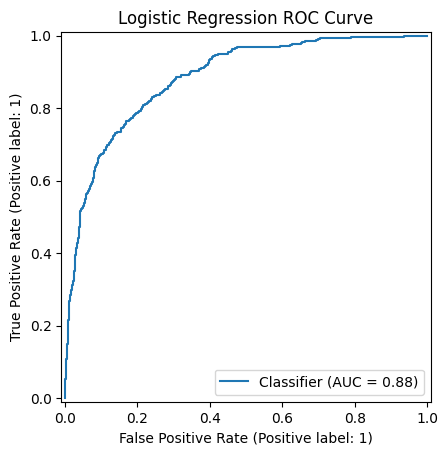

In [113]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
log_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=200, class_weight="balanced"))
])

log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

print("\n🔹 Logistic Regression Results")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log))

RocCurveDisplay.from_predictions(y_test, y_prob_log)
plt.title("Logistic Regression ROC Curve")
plt.show()

In [114]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=200, max_depth=10, random_state=42, class_weight="balanced"
    ))
])
# Fit the model
rf_model.fit(X_train, y_train)
# Predict on test data
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
# Evaluate performance
print("\n Random Forest Results")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))




 Random Forest Results
              precision    recall  f1-score   support

           0       0.95      0.88      0.92      2084
           1       0.54      0.75      0.63       382

    accuracy                           0.86      2466
   macro avg       0.75      0.82      0.77      2466
weighted avg       0.89      0.86      0.87      2466

ROC-AUC: 0.9004682899377958


In [115]:
# Cross-validation for Logistic Regression
from sklearn.model_selection import cross_validate
cv_results_log = cross_validate(log_model, X_train, y_train, cv=5, scoring="roc_auc", return_train_score=True)
print("\n🔹 Logistic Regression Cross-Validation")
print(f"CV ROC-AUC: Mean = {cv_results_log['test_score'].mean():.4f}, Std = {cv_results_log['test_score'].std():.4f}")



🔹 Logistic Regression Cross-Validation
CV ROC-AUC: Mean = 0.8973, Std = 0.0081
